### 資料來源：政府開放資料平台 - 不動產買賣實價登錄批次資料 (http://data.gov.tw/node/6213) - 台北市資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#作圖就直接顯示在jupyter
%matplotlib inline
plt.style.use('ggplot')
#讓圖能直接顯示中文
plt.rcParams['font.family']='DFKai-SB' 
##正常顯示負號
plt.rcParams['axes.unicode_minus']=False 

# 一、資料匯入

In [2]:
#設定pandas最多顯示出50個欄位資訊
pd.set_option("display.max_columns",50) 
df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5') 
#隨機取其中5筆資料
df.sample(5) 

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
307,萬華區,房地(土地+建物),臺北市萬華區環河南路二段250巷1~30號,12.90,住,NaN,NaN,1060503,土地2建物1車位0,二層,十六層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,761030.0,127.86,3,2,2,有,有,14300000,111841.0,NaN,0.00,0,NaN,RPTNMLPKOHMFFBA08CA
135,北投區,房地(土地+建物)+車位,臺北市北投區致遠一路一段61~90號,17.21,住,NaN,NaN,1060422,土地1建物1車位2,四層,八層,套房(1房1廳1衛),住家用,鋼筋混凝土造,1040903.0,130.88,0,0,0,無,有,17500000,133710.0,升降機械,43.12,0,NaN,RPTOMLMJOHMFFEA08CA
235,中山區,車位,臺北市中山區建國北路一段61~90號,1.05,住,NaN,NaN,1060522,土地0建物0車位1,地下二層,十二層,其他,停車空間,見其他登記事項,860517.0,34.12,0,0,0,有,有,2700000,NaN,坡道平面,0.00,2700000,NaN,RPOQMLQJOHMFFCA97CA
58,萬華區,房地(土地+建物),臺北市萬華區康定路91~120號,1.75,商,NaN,NaN,1060428,土地1建物1車位0,十四層,二十六層,套房(1房1廳1衛),住家用,見其他登記事項,1050331.0,26.10,1,1,1,有,有,4840000,185441.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。,RPPOMLPJPHMFFBA77CA
642,萬華區,房地(土地+建物),臺北市萬華區永福街61~90號,19.12,商,NaN,NaN,1060503,土地1建物1車位0,六層,七層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,830607.0,153.47,3,2,1,有,無,16000000,104255.0,NaN,0.00,0,含增建或未登記建物。,RPQNMLSLOHMFFBA28DA


# 二、資料預處理(一)

## 2.1 交易標的：非土地、車位交易

In [3]:
#針對"交易標的"分出各組，後面搭配的方法就是把各組的其他項作統計運算
#因為我們要做的是房價的預測，因此透過groupby可以看到
#土地的建物移轉總面積平方公尺為0
#車位我們也不需要
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


In [4]:
# 去除土地和車位兩種交易資料
# df可以使用條件的判定篩選
# df[設定條件區] -> df[條件]  
# df[設定多條件區] -> df[(條件1) & (條件2)]
# 返回dataframe
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')]#.reset_index(drop=True)
# 篩選完的index並不會重新幫你排序更新，因此我們需要使用reset_index
# drop = True : 丟掉原有的index並更新一組新的
df = df.reset_index(drop=True)
df[:50]

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,大同區,房地(土地+建物),臺北市大同區南京西路91~120號,6.34,住,NaN,NaN,1040303,土地1建物1車位0,八層,十一層,住宅大樓(11層含以上有電梯),商業用,鋼筋混凝土造,831111.0,55.19,1,1,1,有,有,12900000,233738.0,NaN,0.00,0,NaN,RPPOMLMKPHMFFBA57CA
1,內湖區,房地(土地+建物),臺北市內湖區康樂街136巷3弄1~30號,4.96,商,NaN,NaN,1050817,土地1建物1車位0,二層,九層,華廈(10層含以下有電梯),商業用,鋼筋混凝土造,850705.0,38.79,1,1,1,有,有,4300000,110853.0,NaN,0.00,0,NaN,RPSNMLTJRHLFFCA58CA
2,內湖區,房地(土地+建物)+車位,臺北市內湖區民權東路六段91~120號,13.72,商,NaN,NaN,1050811,土地1建物1車位1,九層,十五層,住宅大樓(11層含以上有電梯),商業用,鋼筋混凝土造,970130.0,149.24,3,2,2,有,有,24000000,160815.0,坡道平面,12.96,0,NaN,RPPOMLRJIILFFCA37CA
3,內湖區,房地(土地+建物)+車位,臺北市內湖區文湖街21巷91~120號,22.45,住,NaN,NaN,1050724,土地1建物1車位1,五層,十層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,970723.0,136.20,3,2,1,有,有,20300000,149046.0,坡道平面,34.60,0,NaN,RPSOMLKKRHLFFCA97DA
4,內湖區,房地(土地+建物)+車位,臺北市內湖區大湖山莊街121~150號,33.51,其他,NaN,NaN,1050529,土地1建物1車位1,九層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,931130.0,242.78,5,2,2,有,有,47880000,197216.0,坡道平面,51.07,0,NaN,RPQNMLLKRHLFFCA77DA
5,內湖區,房地(土地+建物),臺北市內湖區舊宗路一段31~60號,15.12,商,NaN,NaN,1050724,土地1建物1車位0,四層,五層,華廈(10層含以下有電梯),商業用,鋼筋混凝土造,920910.0,47.74,2,2,2,有,有,12280000,257227.0,NaN,0.00,0,含增建或未登記建物。,RPOQMLOKRHLFFCA18DA
6,內湖區,房地(土地+建物),臺北市內湖區港墘路82巷7弄1~30號,27.44,住,NaN,NaN,1050715,土地1建物1車位0,五層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,731204.0,115.29,4,2,2,有,無,13800000,119698.0,NaN,0.00,0,NaN,RPRNMLNKRHLFFCA97CA
7,內湖區,房地(土地+建物)+車位,臺北市內湖區港華街51巷8弄1~30號,16.90,住,NaN,NaN,1050718,土地1建物1車位1,五層,九層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,971017.0,133.73,3,1,2,有,無,21500000,160772.0,坡道機械,0.00,0,NaN,RPUNMLTKRHLFFCA88CA
8,內湖區,房地(土地+建物)+車位,臺北市內湖區民權東路六段391~420號,23.43,住,NaN,NaN,1050811,土地1建物1車位1,九層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,940914.0,142.73,2,1,2,有,有,23880000,167309.0,坡道平面,37.71,0,含增建或未登記建物。,RPPNMLNLRHLFFCA87CA
9,內湖區,房地(土地+建物)+車位,臺北市內湖區成功路五段421~450號,28.03,住,NaN,NaN,1050801,土地1建物1車位1,四層，五層,十四層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,870925.0,170.77,3,1,2,有,有,27500000,161035.0,坡道平面,38.00,0,NaN,RPUOMLKMRHLFFCA28CA


In [5]:
# 將總價元改以萬元為單位顯示
# df.loc的用法
# argv1 : 範圍index
# argv2 : ColumnName
# 返回參數 : Series
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000 #改成以萬為單位，方便圖表顯示
df.sample(5)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
14,內湖區,房地(土地+建物),臺北市內湖區康寧路三段265巷1~30號,23.14,住,NaN,NaN,1050728,土地1建物1車位0,四層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,730724.0,82.78,4,2,2,有,無,908.0000,109688.0,NaN,0.00,0,含增建或未登記建物。,RPPNMLMKRHLFFCA67CA
127,士林區,房地(土地+建物),臺北市士林區小西街1~30號,9.30,商,NaN,NaN,1060522,土地1建物1車位0,全,NaN,透天厝,住家用,加強磚造,560526.0,11.48,3,2,2,有,無,545.0000,474739.0,NaN,0.00,0,NaN,RPVOMLTJOHMFFEA98CA
733,士林區,房地(土地+建物),臺北市士林區和豐街1~30號,1.16,住,NaN,NaN,1060511,土地1建物1車位0,一層,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,621225.0,3.86,0,0,0,無,無,71.1091,184220.0,NaN,0.00,0,攤位使用,RPQOMLOKOHMFFEA08CA
619,士林區,房地(土地+建物)+車位,臺北市士林區天母東路1~30號,78.56,商,NaN,NaN,1060525,土地2建物1車位4,三十一層,三十八層,住宅大樓(11層含以上有電梯),住家用,見其他登記事項,1050920.0,701.68,0,0,0,無,有,30090.0000,484018.0,坡道平面,109.76,14400000,土地及建物分次登記案件。車位未個別拆價。,RPSNMLPJPHMFFEA28CA
161,中山區,房地(土地+建物),臺北市中山區新生北路三段84巷31~60號,34.00,商,NaN,NaN,1060503,土地1建物1車位0,四層,四層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,640519.0,114.66,3,2,2,有,無,1370.0000,119484.0,NaN,0.00,0,NaN,RPUNMLMJOHMFFCA87CA


In [6]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,563.620000,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1472.509301,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4283.111866,191406.018605,34.382361,1.393102e+06


## 2.2 產生特徵：交易年/屋齡

In [7]:
# 有了總價元之後，我們要開始對應特徵的萃取
# 想要的資料包含 : 交易年 ; 屋齡
#
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))
print(round(df.loc[0,'交易年月日']/10000))

1040303
<class 'numpy.int64'>
104.0


In [8]:
# 新建"交易年"
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)

In [9]:
print(df.loc[0,'建築完成年月'])
print(type(df.loc[0,'建築完成年月']))

831111.0
<class 'numpy.float64'>


In [10]:
# 先取得我們現今的年份
from datetime import datetime
now = datetime.now()
now.year #(年,月,日,時,分,秒,微秒) ps: 微秒(microseconds)=1/1000000秒
print(round(df.loc[0,'建築完成年月']/10000))
print(now.year - 1911 - round(df.loc[0,'建築完成年月']/10000))


83.0
25.0


In [11]:
# 新建"建築完成年"
# 新建"屋齡"
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i,'屋齡'] = now.year - 1911 - round(df.loc[i,'建築完成年月']/10000)

In [12]:
#確認屋齡
#確認建築完成年
#確認交易年
df.sample(5)


,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
126,士林區,房地(土地+建物),臺北市士林區倫等街42巷1~30號,28.67,住,NaN,NaN,1060429,土地1建物1車位0,一層,三層,公寓(5樓含以下無電梯),住家用,加強磚造,620802.0,61.77,2,1,1,有,無,410.0,66375.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。,RPTOMLQJOHMFFEA48CA,106.0,62.0,46.0
371,信義區,房地(土地+建物),臺北市信義區忠孝東路五段361~390號,5.63,商,NaN,NaN,1060403,土地3建物1車位0,四層,十一層,套房(1房1廳1衛),見其他登記事項,鋼筋混凝土造,940531.0,40.06,1,1,1,有,有,1216.0,303545.0,NaN,0.00,0,含增建或未登記建物。,RPVOMLRJOHMFFDA68CA,106.0,94.0,14.0
249,南港區,房地(土地+建物)+車位,臺北市南港區經貿二路235巷61~90號,35.21,住,NaN,NaN,1060406,土地1建物1車位1,十二層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,990409.0,169.67,2,2,2,有,有,3060.0,180350.0,坡道平面,33.67,0,NaN,RPXOMLNJOHMFFDA48CA,106.0,99.0,9.0
237,士林區,房地(土地+建物)+車位,臺北市士林區天玉街31~60號,72.53,住,NaN,NaN,1060416,土地1建物1車位2,四層,十九層,住宅大樓(11層含以上有電梯),住家用,見使用執照,910917.0,376.34,3,2,2,有,有,8088.0,214912.0,坡道平面,105.66,0,NaN,RPVNMLQJOHMFFEA58CA,106.0,91.0,17.0
628,信義區,房地(土地+建物),臺北市信義區吳興街220巷11弄31~60號,29.12,住,NaN,NaN,1060601,土地1建物1車位0,一層，平台,四層,公寓(5樓含以下無電梯),NaN,鋼筋混凝土造,NaN,80.74,2,1,1,有,無,1300.0,161011.0,NaN,0.00,0,NaN,RPWOMLPKOHMFFDA68CA,106.0,NaN,NaN


# 三、資料探索

## 3.1 各鄉鎮資料筆數

Text(0, 0.5, '資料筆數')

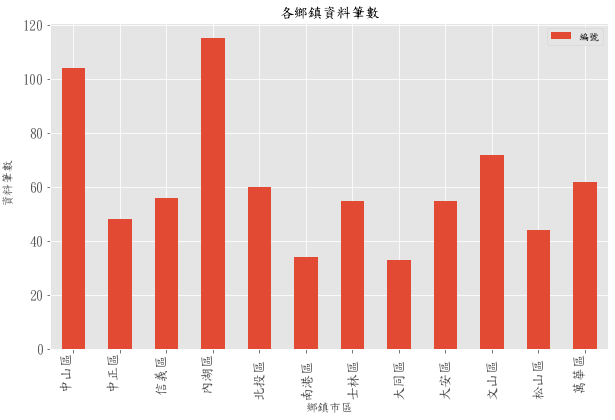

In [13]:
# 整理好的資料我們可以先使用圖形化檢視
# 查看鄉鎮市區出售房子的交易多寡
# count會把除了鄉鎮市區之外其他col標籤底下數據出現的次數做統計
# df的.plot()會回傳該圖象的圖表基本配置config 我們設定為ax
# 在plot內繪製的類型可以使用
# kind : 甚麼類型的圖
# y : col標籤
# figsize : 圖形大小
# fontsize : 圖形字樣大小
# title : 圖形名稱
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

In [14]:
df.groupby('鄉鎮市區').count()

,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
鄉鎮市區,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
中山區,104,104,104,100,0,0,104,104,104,104,104,100,104,93,104,104,104,104,104,104,104,104,27,104,104,45,104,104,93,93
中正區,48,48,48,44,0,0,48,48,48,48,48,42,48,39,48,48,48,48,48,48,48,48,9,48,48,27,48,48,39,39
信義區,56,56,56,56,0,0,56,56,56,56,56,54,56,41,56,56,56,56,56,56,56,56,12,56,56,29,56,56,41,41
內湖區,115,115,115,114,0,0,115,115,115,115,115,115,115,113,115,115,115,115,115,115,115,114,50,115,115,49,115,115,113,113
北投區,60,60,60,60,0,0,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,29,60,60,21,60,60,60,60
南港區,34,34,34,34,0,0,34,34,34,34,34,34,34,28,34,34,34,34,34,34,34,34,16,34,34,14,34,34,28,28
士林區,55,55,55,55,0,0,55,55,55,54,55,55,55,55,55,55,55,55,55,55,55,55,16,55,55,34,55,55,55,55
大同區,33,33,33,32,0,0,33,33,33,32,33,29,32,27,33,33,33,33,33,33,33,33,9,33,33,20,33,33,27,27
大安區,55,55,55,55,0,0,55,55,55,55,55,51,55,36,55,55,55,55,55,55,55,55,11,55,55,35,55,55,36,36


## 3.2 相關性分析

In [50]:
# 進行相關性分析
# 將df想要知道的相關性標籤同步篩選出來並使用.corr()
corr = df[['總價元','土地移轉總面積平方公尺','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()
corr

,總價元,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.718356,0.897664,0.037094,-0.051536,0.062915,0.472775,0.517171,-0.351787,0.351787,-0.044518
土地移轉總面積平方公尺,0.718356,1.000000,0.837357,0.218130,0.107488,0.168725,0.236906,0.215380,-0.090268,0.090268,0.006141
建物移轉總面積平方公尺,0.897664,0.837357,1.000000,0.072909,-0.027742,0.056027,0.451150,0.384596,-0.303746,0.303746,-0.048933
建物現況格局-房,0.037094,0.218130,0.072909,1.000000,0.664950,0.761660,0.016739,-0.012425,0.101536,-0.101536,-0.032178
建物現況格局-廳,-0.051536,0.107488,-0.027742,0.664950,1.000000,0.547287,-0.049335,-0.076489,0.051712,-0.051712,-0.001068
建物現況格局-衛,0.062915,0.168725,0.056027,0.761660,0.547287,1.000000,0.009501,-0.009853,-0.025424,0.025424,-0.070500
車位移轉總面積平方公尺,0.472775,0.236906,0.451150,0.016739,-0.049335,0.009501,1.000000,0.741627,-0.462698,0.462698,-0.096084
車位總價元,0.517171,0.215380,0.384596,-0.012425,-0.076489,-0.009853,0.741627,1.000000,-0.357414,0.357414,-0.061319
屋齡,-0.351787,-0.090268,-0.303746,0.101536,0.051712,-0.025424,-0.462698,-0.357414,1.000000,-1.000000,0.142024
建築完成年,0.351787,0.090268,0.303746,-0.101536,-0.051712,0.025424,0.462698,0.357414,-1.000000,1.000000,-0.142024


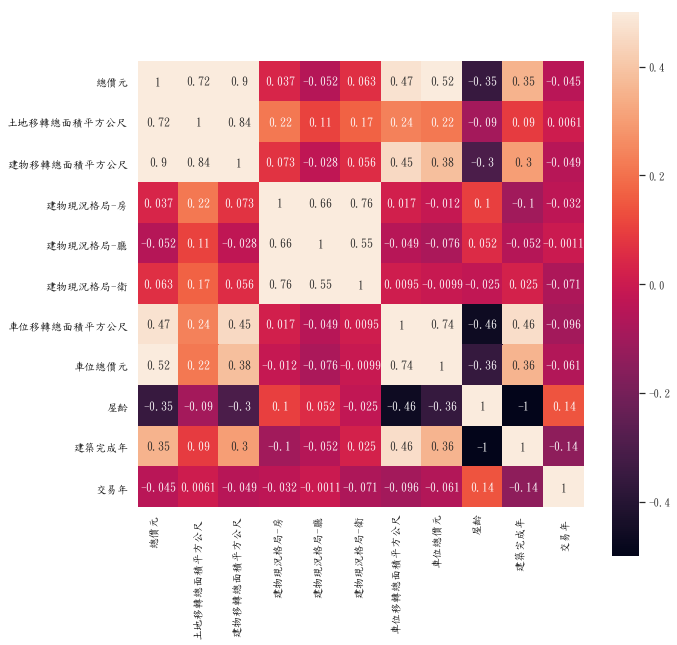

In [65]:
# 繪製相關性的熱力圖
# seaborn 
# 本身與matplotlib連動，因此創建畫布物件的工作依然交由matplotlib執行
# seaborn 
# vmin與vmax : 設定最大最小閾值
# annot=True 將數據寫入每格
# square=True : 整個網格為一個方格
import seaborn as sns
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, square=True, annot=True,vmin=-0.5, vmax=0.5)
#square:
#annot:

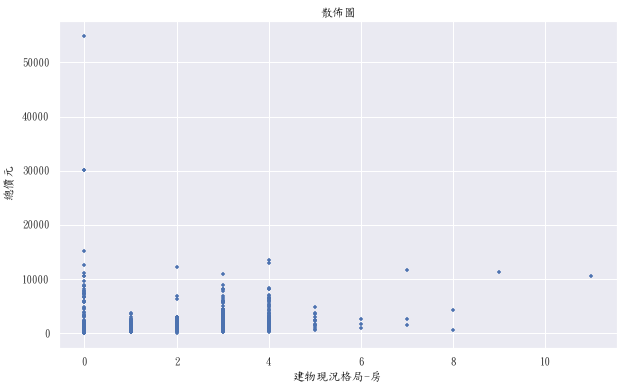

In [66]:
# 從房間數與總價可以發現，房間數與總價元的相關性極差
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-房',y='總價元',marker='+')

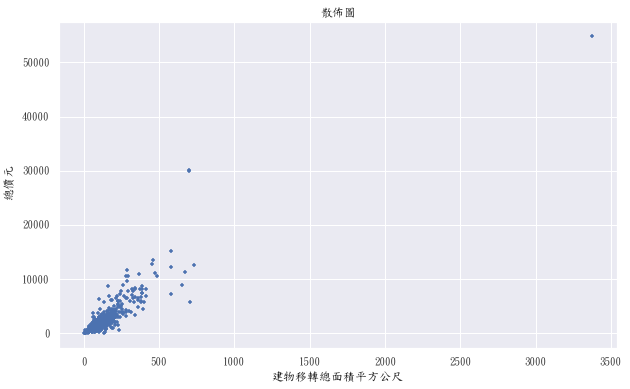

In [67]:
# 從建物移轉總面積平方公尺與總價可以發現，房間數與總價元的相關性極佳
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物移轉總面積平方公尺',y='總價元',marker='+')

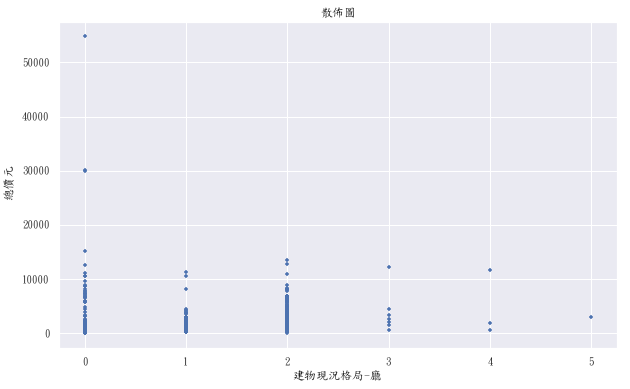

In [68]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='建物現況格局-廳',y='總價元',marker='+')

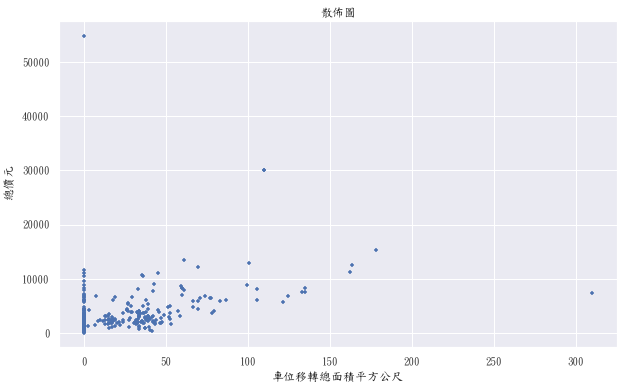

In [69]:
df.plot(kind='scatter',title='散佈圖',figsize=(10,6),x='車位移轉總面積平方公尺',y='總價元',marker='+')

## 3.3 各鄉鎮比較

In [70]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,16.297692,105.000096,182520.461538,2.076923,1.375000,1.519231,7.903173,479519.230769,22.096774,85.903226,105.903846,2139.697917
中正區,17.749583,113.277500,203961.895833,1.708333,1.145833,1.187500,5.110417,277083.333333,24.743590,83.256410,105.833333,2477.166704
信義區,28.029821,127.634286,189706.750000,2.267857,1.428571,1.446429,8.865714,298214.285714,29.780488,78.219512,105.946429,2314.053964
內湖區,37.064609,182.183652,162547.035088,2.521739,1.530435,1.547826,17.334609,478695.652174,21.176991,86.823009,105.652174,2892.934783
北投區,28.839167,133.713000,142094.283333,2.050000,1.366667,1.350000,17.170833,734166.666667,21.016667,86.983333,105.866667,1960.550000
南港區,31.355000,156.041176,164861.647059,2.294118,1.529412,1.500000,15.133824,555882.352941,16.142857,91.857143,105.970588,2641.029412
士林區,33.232364,148.830000,179288.290909,2.309091,1.563636,1.545455,15.637818,938181.818182,30.109091,77.890909,106.000000,3244.573075
大同區,18.098182,108.097576,142900.272727,2.212121,1.454545,1.303030,7.021212,192424.242424,24.185185,83.814815,105.909091,1549.110000
大安區,22.519455,126.577636,247827.327273,2.163636,1.436364,1.400000,6.381818,252727.272727,25.722222,82.277778,106.000000,3099.045173


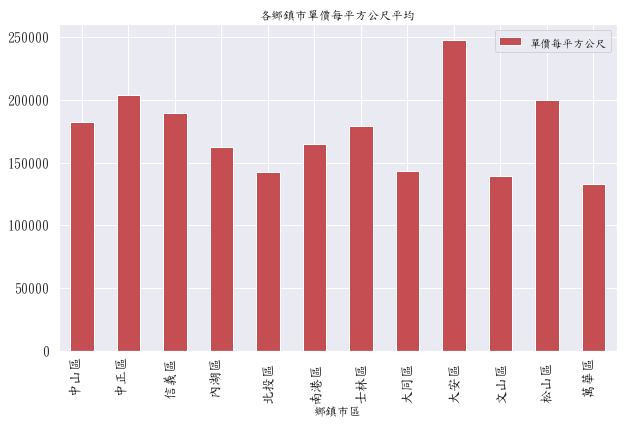

In [80]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar',y='單價每平方公尺',figsize=(10,6),fontsize=14,title='各鄉鎮市單價每平方公尺平均',color = "r")